In [3]:
import numpy as np
import pandas as pd
import math
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style="darkgrid")


In [4]:
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='ISO-8859-1', skiprows=59)

df.head()

,Class,H,H.1,H.2,H.3,H.4,H.5,H.6,H.7,H.8,...,M.39,M.40,M.41,M.42,M.43,M.44,M.45,M.46,M.47,M.48
0,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
1,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
2,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
3,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
4,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966


In [6]:
df = df.T
df.columns = df.iloc[0]
df.drop('Class', inplace=True)
df['class'] = df.index
df['class'] = df['class'].apply(lambda x: x[0])
df.set_index('ID_REF', inplace=True)
df

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,class
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,10.742427,7.270560667,...,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612,H
GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,9.865655308,4.810194735,...,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691,H
GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,10.148454,7.822844272,...,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396,H
GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,10.87991277,5.690417407,...,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612,H
GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,10.09052505,7.089369391,...,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,5.375997385,6.133231971,...,5.942308,7.290514,8.988511,5.567947,5.55878,5.429437,4.48794,4.254286,5.375811,M
GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,9.613538724,3.89680742,...,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.88208,3.744138,M
GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,9.312493837,5.545193595,...,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536,M


In [7]:
def convert_to_numeric(col):
    try:
        return pd.to_numeric(col)
    except:
        return col
    
df = df.apply(convert_to_numeric)
df.dtypes

Class
1007_s_at          float64
1053_at            float64
117_at             float64
121_at             float64
1255_g_at          float64
                    ...   
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
class               object
Length: 54676, dtype: object


### a. High level description of the data and some pre-processing

1) How many genes profiled?

In [8]:
num_genes = df.shape[1] - 1
print(f'There were {num_genes} genes profiled.')

There were 54675 genes profiled.


2) How many samples (subjects/patients) in total?

In [9]:
num_samples = df.shape[0]
print(f'There were {num_samples} subjects in the study.')

There were 99 subjects in the study.


3) How many samples in each class?

In [10]:
num_of_class_h = len(df[df['class'] == 'H'])
print(f'There were {num_of_class_h} healthy samples (class = H). The rest ({num_samples - num_of_class_h}) have Myocardial Infraction.')

There were 50 healthy samples (class = H). The rest (49) have Myocardial Infraction.


4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [11]:
df.dropna(axis=1, inplace=True)
print(f"There were {num_genes-df.shape[1] -1} genes with missing values. After dropping, we're left with {df.shape[1] -1} genes.")
num_genes = df.shape[1] -1

There were 45 genes with missing values. After dropping, we're left with 54628 genes.


5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

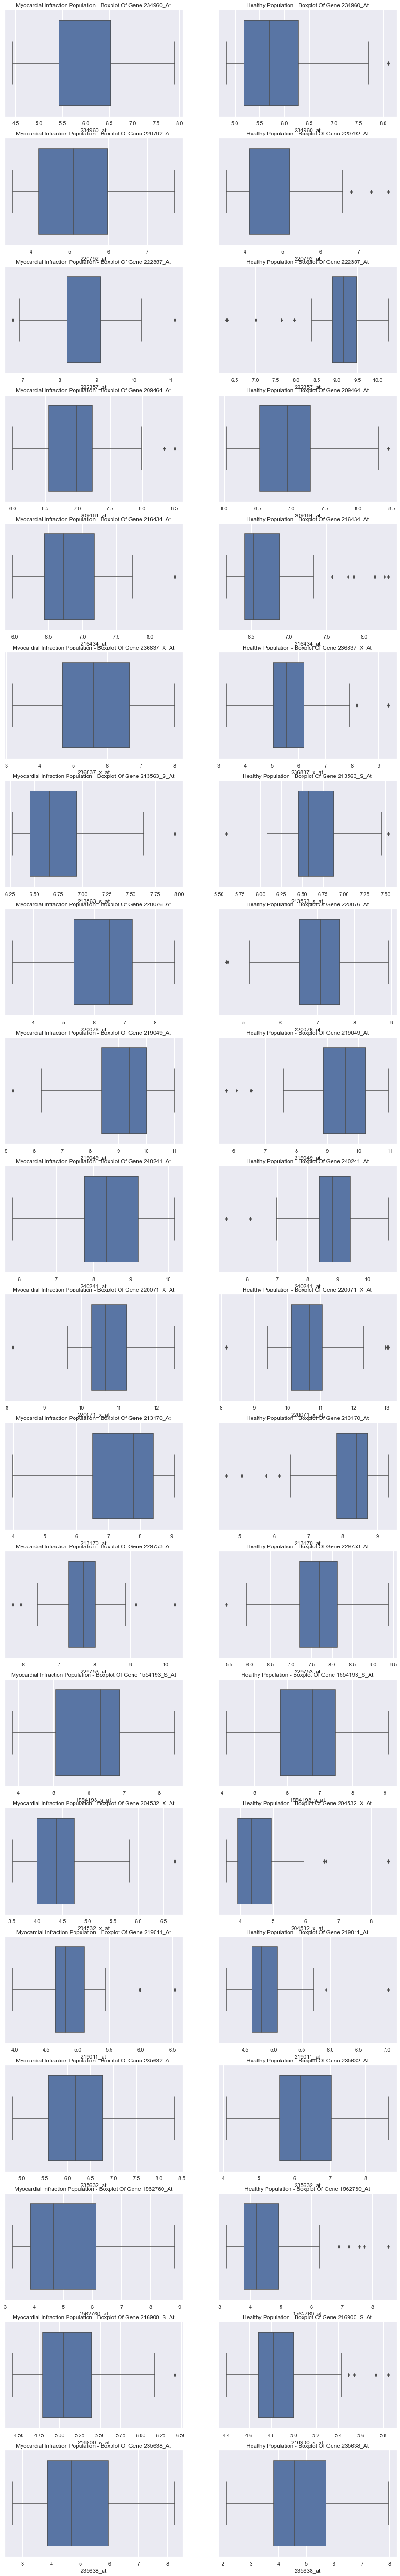

In [12]:
df_h = df[df['class'] == 'H']
df_m = df[df['class'] == 'M']
NUM_GENES = 20

random_genes = np.random.choice(df.columns, NUM_GENES, replace=False)

fig, axs = plt.subplots(NUM_GENES, 2, figsize=(15, 5 * NUM_GENES))
for axis_index, gene in enumerate(random_genes):
    ax0 = sns.boxplot(df_m[gene], ax=axs[axis_index, 0])
    ax1 = sns.boxplot(df_h[gene], ax=axs[axis_index, 1])

    ax0.set_title(f'myocardial infraction population - boxplot of gene {gene}'.title())
    ax1.set_title(f'healthy population - boxplot of gene {gene}'.title())

    print("\n")

plt.show()


### WRS for differential expression(DE)

1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

In [13]:
n = len(df)
b = len(df[df['class'] == 'M'])
mu = b * ((n + 1) / 2)
print(f"The expected rank sum is {int(mu)}")

The expected rank sum is 2450


2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

In [14]:
c = sum([i for i in range(n - b + 1, n + 1)])
print(f"The maximal value will be achieved if all of the top ranks would be from the M population. In this case {c}")

The maximal value will be achieved if all of the top ranks would be from the M population. In this case 3675


3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

In [15]:
num_combs = math.comb(n, b)
p_c = 1 / num_combs
print(f"There is only one combination in which the the rank sum equals the maximal rank sum, hence the probability is 1/all possible combinations: {p_c:.3}")

There is only one combination in which the the rank sum equals the maximal rank sum, hence the probability is 1/all possible combinations: 1.98e-29


4) Under the null model,what is the probability of RS(g)=c-1? what is the probability of RS(g) = c-2?
(Provide formulas and explain them)


To calculate $RS(g) = c-1$, we'll examine the number of different combinations that result in $c-1$. We can see that there is, again, only one combination here - M will occupy rank 50 and all of ranks from 52 to 99. Meaning, the probability will be the same as the probability for $RS(g) = c$.

We'll do the same for $RS(g) = c-2$ and find two different option: if M will occupy the 49th spot and ranks 52-99, we'll reach that conclusion. Also, M can occupy ranks 53-99 and the 50th and 51st spot. Meaning, the probaility is:

In [16]:
print(f"{2/num_combs:.3}")

3.96e-29


5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

In [17]:
genes_cols = list(df.columns)[:-1]
rss = [df[col].rank()[df['class'] == 'M'].sum() for col in genes_cols]
iqr = st.iqr(rss)
iqr

329.0

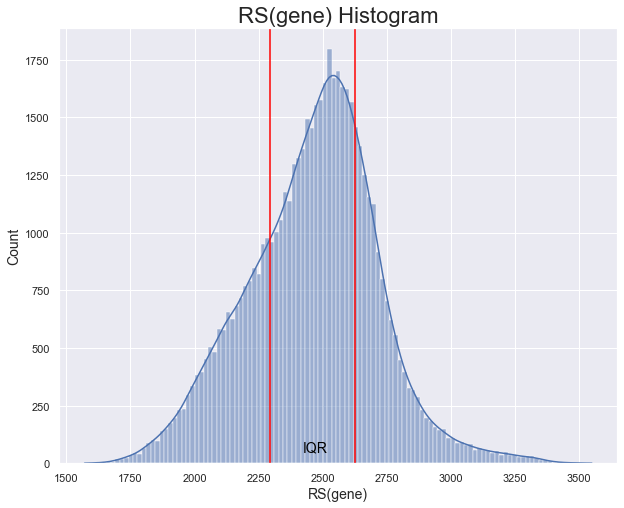

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(rss, kde=True)

ax.annotate("IQR", xy=(2420, 50), color='black', fontsize=14)

ax.axvline(x=np.percentile(rss, 25), color='red')
ax.axvline(x=np.percentile(rss, 75), color='red')

plt.ylabel("Count", fontsize=14)
plt.xlabel("RS(gene)", fontsize=14)
plt.title("RS(gene) Histogram", fontsize=22)

plt.show()

### c. DifferentialExpression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

In [19]:
# WRS Test

wrs_p_vals_m_over_h = [(gene_col, st.ranksums(df[gene_col][df['class'] == 'M'], df[gene_col][df['class'] == 'H'], alternative='greater')[1]) for gene_col in genes_cols]
wrs_p_vals_m_over_h = [gene for gene in wrs_p_vals_m_over_h if gene[1] <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_m_over_h)} genes in which M > H at a p-value better than 0.07")

wrs_p_vals_h_over_m = [(gene_col, st.ranksums(df[gene_col][df['class'] == 'H'], df[gene_col][df['class'] == 'M'], alternative='greater')[1]) for gene_col in genes_cols]
wrs_p_vals_h_over_m = [gene for gene in wrs_p_vals_h_over_m if gene[1] <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_h_over_m)} genes in which M < H at a p-value better than 0.07")


Under WRS test, there are 10787 genes in which M > H at a p-value better than 0.07
Under WRS test, there are 10667 genes in which M < H at a p-value better than 0.07


In [20]:
# Student T-Test

t_p_vals_m_over_h = [(gene_col, st.ttest_ind(df[gene_col][df['class'] == 'M'], df[gene_col][df['class'] == 'H'], alternative='greater')[1]) for gene_col in genes_cols]
t_p_vals_m_over_h = [gene for gene in t_p_vals_m_over_h if gene[1] <= 0.07]
print(f"Under t test, there are {len(t_p_vals_m_over_h)} genes in which M < H at a p-value better than 0.07")

t_p_vals_h_over_m = [(gene_col, st.ttest_ind(df[gene_col][df['class'] == 'H'], df[gene_col][df['class'] == 'M'], alternative='greater')[1]) for gene_col in genes_cols]
t_p_vals_h_over_m = [gene for gene in t_p_vals_h_over_m if gene[1] <= 0.07]
print(f"Under t test, there are {len(t_p_vals_h_over_m)} genes in which M > H at a p-value better than 0.07")


Under t test, there are 8517 genes in which M < H at a p-value better than 0.07
Under t test, there are 8639 genes in which M > H at a p-value better than 0.07


Select the 80 most significant genes from each one of the one- sided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.

In [21]:
wrs_m_over_h_subset = pd.DataFrame(wrs_p_vals_m_over_h, columns=["gene", "p_value"]).sort_values(by="p_value").iloc[: 80]
wrs_m_over_h_subset["expressed"] = "over"

wrs_h_over_m_subset = pd.DataFrame(wrs_p_vals_h_over_m, columns=["gene", "p_value"]).sort_values(by="p_value").iloc[: 80]
wrs_h_over_m_subset["expressed"] = "under"

D = wrs_m_over_h_subset.append(wrs_h_over_m_subset)

D.head()

,gene,p_value,expressed
3926,208869_s_at,7.276809e-15,over
5486,216248_s_at,9.053458e-15,over
2877,204622_x_at,1.002448e-13,over
10539,244054_at,2.423984e-13,over
2703,203888_at,2.686869e-13,over


1) Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.

All cols in D are the columns we want the kendal corr for. So we'llcreate a new df, with just those cols, and calculate the kendall corr there.

In [22]:
kendell_df = df[D.gene]

kendell_df.head()

Class,208869_s_at,216248_s_at,204622_x_at,244054_at,203888_at,203887_s_at,217202_s_at,203574_at,241279_at,240103_at,...,223588_at,221081_s_at,222108_at,235310_at,230428_at,235779_at,242874_at,1565882_at,227626_at,224879_at
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,8.070220,5.802974,6.896882,6.711893,5.780497,6.038182,6.781219,9.023625,6.667995,7.770745,...,6.203788,10.616645,8.120315,6.590359,8.718653,7.822442,9.455573,6.969992,8.858780,9.591532
GSM1620820,7.779279,5.969281,11.701536,7.239616,6.134241,6.171686,6.837768,8.169069,6.362268,5.389721,...,4.853874,10.868348,7.762667,7.161141,8.621958,6.992076,9.317101,7.494097,9.237849,9.683986
GSM1620821,8.901285,9.161624,10.016036,6.505777,3.371993,4.150094,6.396831,8.446429,6.709201,5.493529,...,3.736956,10.073093,7.790073,6.133729,7.956835,7.651365,8.738829,6.576974,8.441349,9.383290
GSM1620822,7.808380,4.771720,6.018702,5.591840,5.648239,5.385700,6.400286,6.936367,5.686112,6.286257,...,5.306395,10.780436,8.374069,6.893969,9.110403,8.991112,9.554941,6.771564,8.920919,9.847400
GSM1620823,8.170853,5.938545,6.692284,6.686149,5.734383,5.703590,6.709851,8.012119,6.543745,6.528912,...,5.007132,10.762445,8.219504,7.129899,7.974059,7.821126,9.589432,6.657010,8.906963,9.731894


As expected, 160 columns(genes)

In [23]:
corr = kendell_df.corr(method="kendall")
corr.shape

(160, 160)

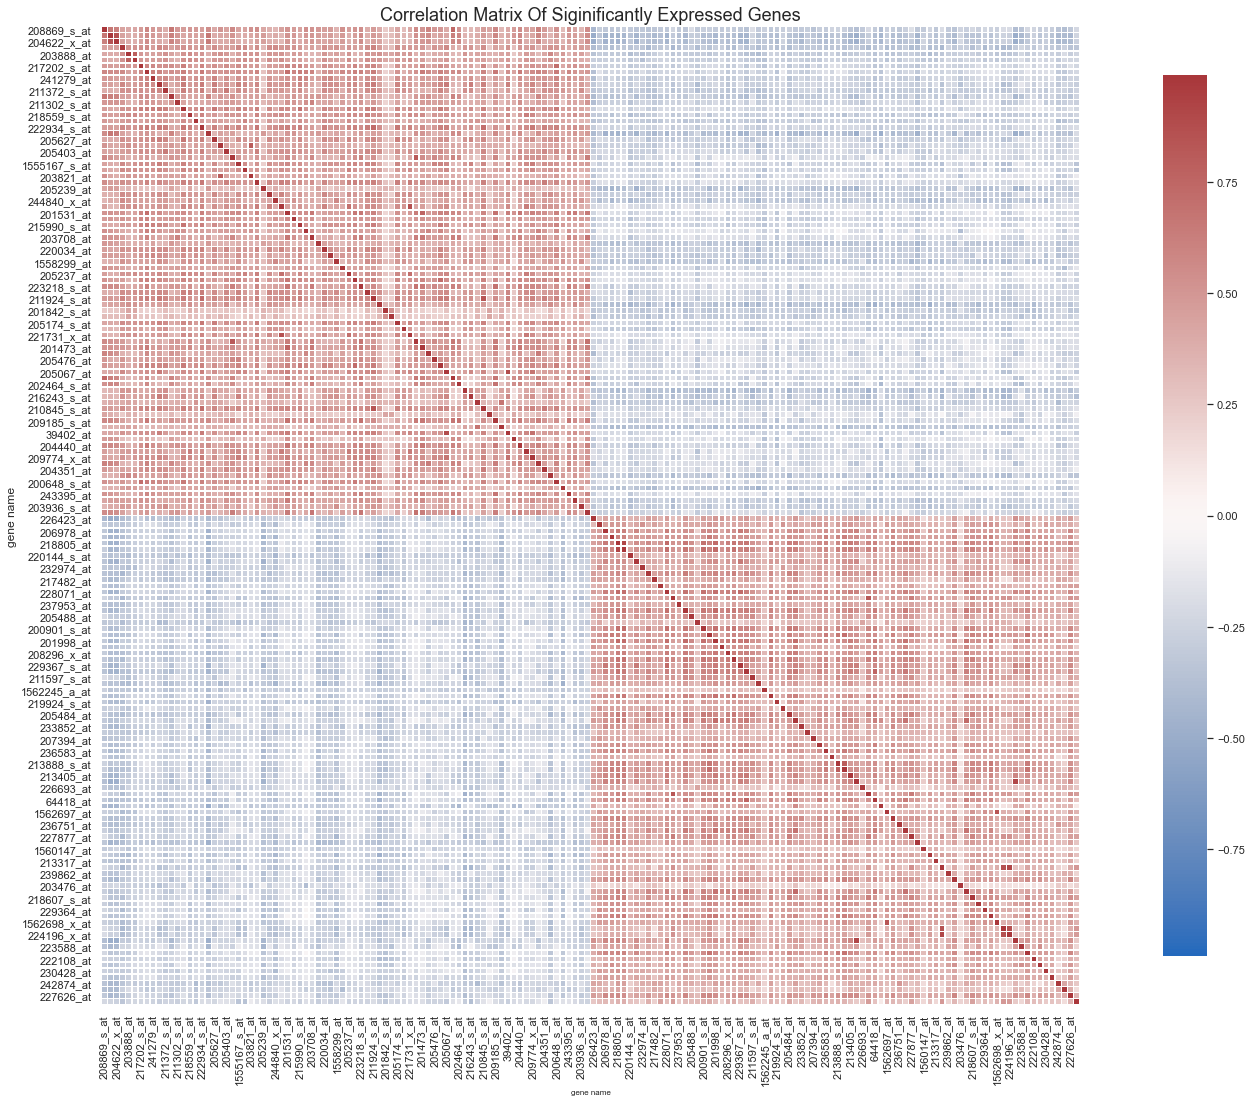

In [24]:
sns.set(style="white")

f, ax = plt.subplots(figsize=(30, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="vlag", vmax=.99, vmin=-0.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})

plt.title("Correlation Matrix of siginificantly expressed genes".title(), fontsize=18)

plt.xlabel('gene name', fontsize=8)
plt.ylabel('gene name', fontsize=12)
plt.show()

2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏?


Under the Null model, the random variables are pairwise independent. Pairwise independent random variables with finite variance are uncorrelated --> $ E(\tau) =  0$.

3) Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.


In [25]:
over_expressed_kendell_df = df[D[D.expressed == "over"].gene]
over_expressed_kendell_df.shape

(99, 80)

Chose only overexpressed genes, 80 columns(genes) -  as expected.

In [26]:
over_expressed_corr = over_expressed_kendell_df.corr(method="kendall")

In [27]:
over_expressed_corr.columns

Index(['208869_s_at', '216248_s_at', '204622_x_at', '244054_at', '203888_at',
       '203887_s_at', '217202_s_at', '203574_at', '241279_at', '240103_at',
       '211372_s_at', '208868_s_at', '211302_s_at', '210423_s_at',
       '218559_s_at', '216015_s_at', '222934_s_at', '204621_s_at', '205627_at',
       '38037_at', '205403_at', '216236_s_at', '1555167_s_at', '216016_at',
       '203821_at', '205863_at', '205239_at', '1552772_at', '244840_x_at',
       '204620_s_at', '201531_at', '217591_at', '215990_s_at', '235536_at',
       '203708_at', '202672_s_at', '220034_at', '203853_s_at', '1558299_at',
       '204908_s_at', '205237_at', '201963_at', '223218_s_at', '210146_x_at',
       '211924_s_at', '1568830_at', '201842_s_at', '223597_at', '205174_s_at',
       '239085_at', '221731_x_at', '202497_x_at', '201473_at', '220086_at',
       '205476_at', '207275_s_at', '205067_at', '211458_s_at', '202464_s_at',
       '1555643_s_at', '216243_s_at', '239336_at', '210845_s_at',
       '202291_s_a

In [28]:
over_expressed_corr_values = []
cols = list(over_expressed_corr.columns)

for i, (index, row) in enumerate(start=0, iterable=over_expressed_corr.iterrows()):
    over_expressed_corr_values.extend(row[i + 1: ])  # for each row, append all values to the right of the correlation with itself


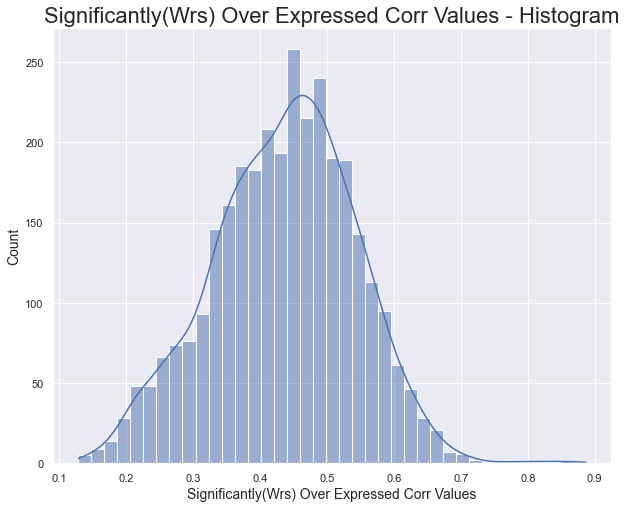

In [29]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(over_expressed_corr_values, kde=True)

plt.ylabel("Count", fontsize=14)
plt.xlabel("significantly(WRS) over expressed corr values".title(), fontsize=14)
plt.title("significantly(WRS) over expressed corr values - Histogram".title(), fontsize=22)

plt.show()

In [30]:
print(f"The mean corr for the 80 over-expressed genes in D, is: {np.mean(over_expressed_corr_values):.3f}.\n"
"While we expected it to be 0.\n")

print(f"The mean corr for all the corrs in D, is: {np.array(corr).flatten().mean():.4f}.\n"
"While we expected it to be 0.")  # corr here is the corr of D

The mean corr for the 80 over-expressed genes in D, is: 0.436.
While we expected it to be 0.

The mean corr for all the corrs in D, is: 0.0902.
While we expected it to be 0.


4) What can you report about co-expression of genes in D (co- expression is inferred from the correlation of the expression levels of genes, across a set of samples)?


From the data aquired thus far, we can say the over-expressed genes in D are positively correlated. Furthermore, we can say that the correlation values distribute normally with a mean at around 0.45.
If we'd look at the heatmap above, we can conclude that there are four different cases, that correlate in two different ways. Ther over-expressed <> over-expressed genes and the under-expressed <> under-expressed genes which have high positive correlation (red) and the cross genes (over-expressed <> under-expressed and under-expressed <> over-expressed) which are strongly negatively correlated.
<br>
We'll plot the final group - the under-expressed <> under-expressed case:

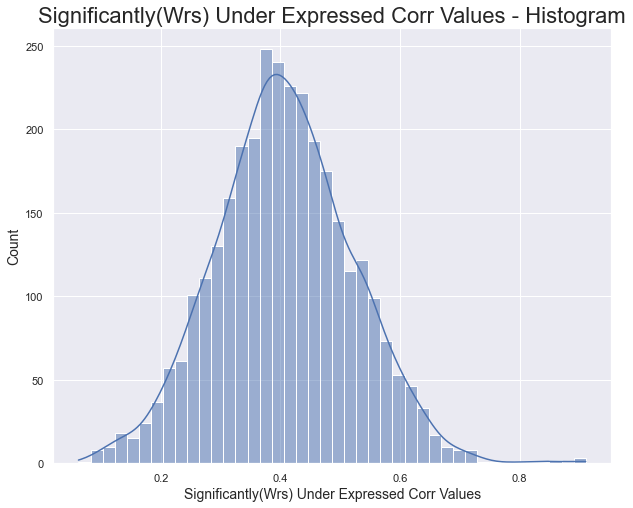

In [31]:
under_expressed_kendell_df = df[D[D.expressed == "under"].gene]

under_expressed_corr = under_expressed_kendell_df.corr(method="kendall")

under_expressed_corr_values = []
cols = list(under_expressed_corr.columns)

for i, (index, row) in enumerate(start=0, iterable=under_expressed_corr.iterrows()):
    under_expressed_corr_values.extend(row[i + 1: ])  # for each row, append all values to the right of the correlation with itself

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(under_expressed_corr_values, kde=True)

plt.ylabel("Count", fontsize=14)
plt.xlabel("significantly(WRS) under expressed corr values".title(), fontsize=14)
plt.title("significantly(WRS) under expressed corr values - Histogram".title(), fontsize=22)

plt.show()

Indeed, as we suspected, there is a positive correlation between genes expression levels that are under-expressed according to WRS.

### I'm not sure why we need this
Let's check all of the genes in D:

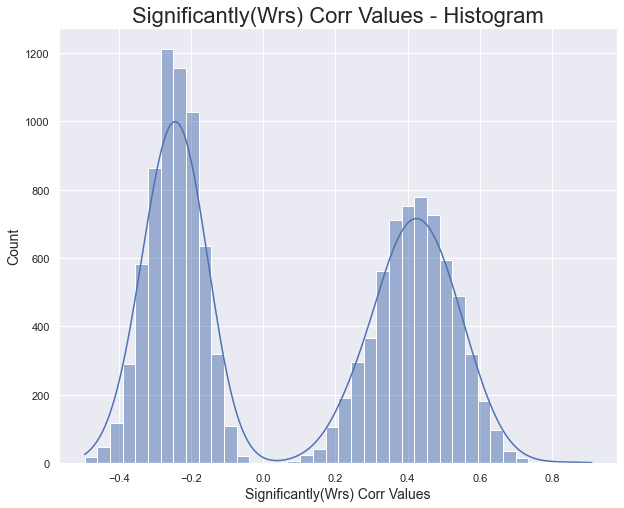

In [32]:
expressed_kendell_df = df[D.gene]

expressed_corr = expressed_kendell_df.corr(method="kendall")

expressed_corr_values = []
cols = list(expressed_corr.columns)

for i, (index, row) in enumerate(start=0, iterable=expressed_corr.iterrows()):
    expressed_corr_values.extend(row[i + 1: ])  # for each row, append all values to the right of the correlation with itself

expressed_corr_values = np.array(expressed_corr_values)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(expressed_corr_values, kde=True, bins=40)

plt.ylabel("Count", fontsize=14)
plt.xlabel("significantly(WRS) corr values".title(), fontsize=14)
plt.title("significantly(WRS) corr values - Histogram".title(), fontsize=22)

plt.show()

Let's see how many of the correlations are "strong". We define strong from this paper: https://www.sciencedirect.com/topics/medicine-and-dentistry/gene-co-expression-network#:~:text=A%20gene%20co%2Dexpression%20network,et%20al.%2C%202003).

In [33]:
strong_corr_threshold = 0.5
count_strong_corr = len(expressed_corr_values[expressed_corr_values > strong_corr_threshold])

print(f"There are {count_strong_corr} strong correlations out of D (with {len(expressed_corr_values)} total correlations), which account for {count_strong_corr/len(expressed_corr_values) * 100:.2f} %")

There are 1521 strong correlations out of D (with 12720 total correlations), which account for 11.96 %


To conclude, we'd report that - overexpressed-overexpressed & underexpressed-underexpressed genes pairs are positvely correlated(co-expressed) and that overexpressed-underexpressed & underexpressed-overexpressed genes pairs are negatively correlated (go with opposite directions).

5) What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.


According to the formula in class: $$ FDR(p) = \frac{pN}{O(p)} $$
Where p = 0.05, N = num_genes and we need to find O(p).
Then it's simply: $$ O(p) = \frac{pN}{FDR(p)} = \frac{0.05N}{0.05} = N = 54628. $$


In [34]:
num_genes

54628

6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?



#TODO change this a bit. but I agree with this in general:

We believe the key point to answer this is to understand that it is possible to get a high correlation for 2 genes that are not especially over/under expressed.
However, doing this preprocessing of narrowing down to only the most over & under expressed genes - actually helps us to reach closer to a relationship of causation. This way we ensure higher chances that a biological truth will stand behind the correlation.

So, the advantage of computing over all genes is the adventage of a brute-force approach - this way we can reveal all correlations, and potentially find interesting, strongly correlated pairs that are not necessairily in our over & under expressed samples, for 2 reasons - either they're not especially over/under expressed - as we stated above, or because they're not in the top 80 of each group. Maybe in the top 100 for example.

For the disadvantages:

- Complexity - the number of pairs is in order of magnitude of |genes|^2 which is ~54000^2 =~ 3 Billion pairs
- False Positives - as we explained above - the differential expression helps us to place a ground of biological truth behind the correlations. For all pairs - with such high numbers we can get many high correlations, just by chance.

### e. Plots and Conclusions of the DE and correlation analysis

1) Construct the DE overabundance plots (blue and green lines
as shown in class) for M vs H overexpression (higher
expression levels in M) using WRS and t-test using the results
you had computed in Section 3c. <br>

In [35]:
def DE_overabundance_plot(genes_and_p_vals, title):
    p_vals = np.linspace(0, 1, num_genes//1) # the number of p_vals we're checking = number of genes / 50 = [0.001, 0.002, ..., ], because of running-time
    lent = len(genes_and_p_vals)

    counts_list = []
    expected_counts_list = []
    for p_val in p_vals:
        count_lower_than_current_p_val = len([item[1] for item in genes_and_p_vals if item[1] <= p_val]) 
        counts_list.append(count_lower_than_current_p_val)

        excpected_lower_than_p_val = p_val * lent
        expected_counts_list.append(excpected_lower_than_p_val)

    plt.figure(figsize=(15, 12))
    sns.scatterplot(x=p_vals, y=counts_list)
    sns.scatterplot(x=p_vals, y=expected_counts_list)

    plt.title(title, fontsize=25)
    plt.xlabel("p-value(i)", fontsize=20)
    plt.ylabel("i", fontsize=20)
    # plt.legend()
    plt.show()

    return expected_counts_list, counts_list

In [36]:
wrs_p_vals_m_over_h1 = [(gene_col, st.ranksums(df[gene_col][df['class'] == 'M'], df[gene_col][df['class'] == 'H'], alternative='greater')[1]) for gene_col in genes_cols]


#TODO: why do we need this? why can't we use `wrs_p_vals_m_over_h`?

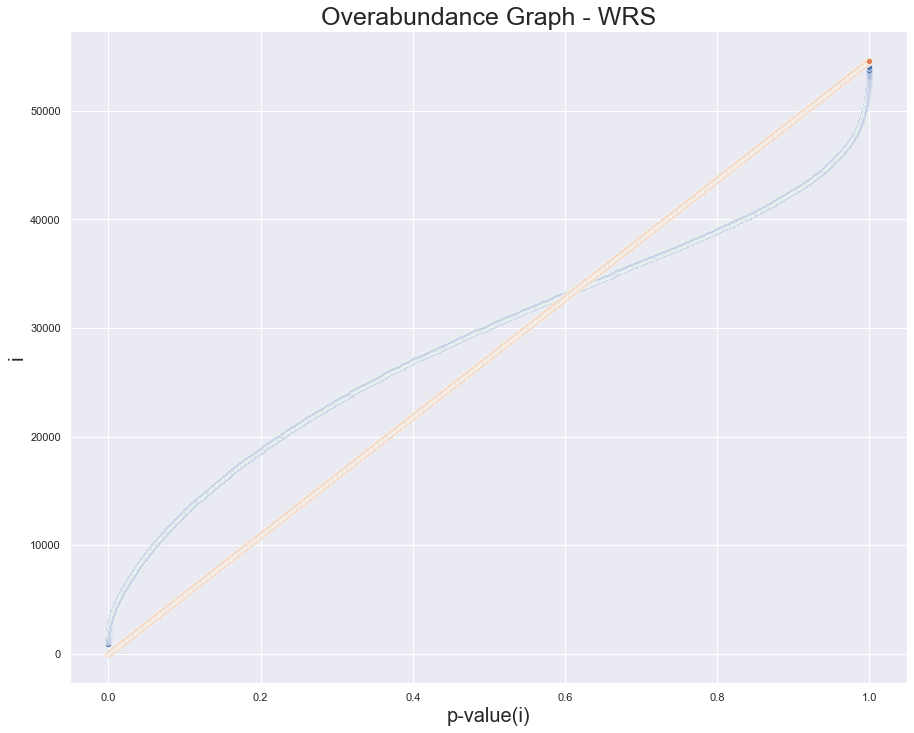

In [37]:
wrs_expected_counts_list, wrs_counts_list = DE_overabundance_plot(wrs_p_vals_m_over_h1, "Overabundance Graph - WRS")

In [38]:
t_p_vals_m_over_h1 = [(gene_col, st.ttest_ind(df[gene_col][df['class'] == 'M'], df[gene_col][df['class'] == 'H'], alternative='greater')[1]) for gene_col in genes_cols]


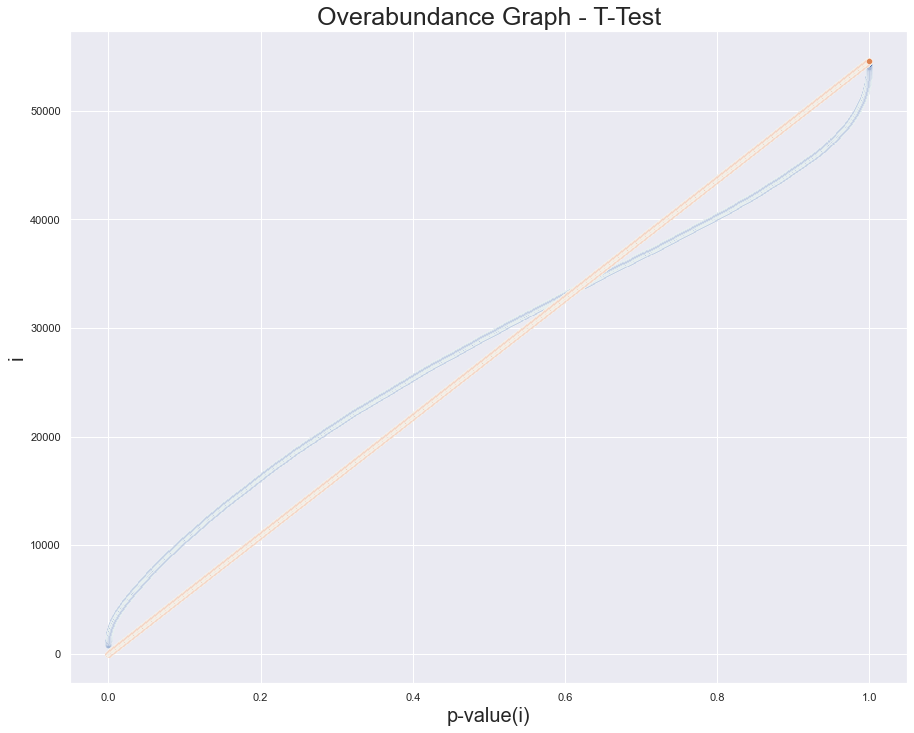

In [39]:
t_expected_counts_list, t_counts_list = DE_overabundance_plot(t_p_vals_m_over_h1, "overabundance graph - t-Test".title())

State, for each comparison, the number of genes, k, at which
we observe: <br>
a) FDR = 0.05 <br>
b) FDR = 0.01 <br>
c) FDR = 0.005 <br>
If these events are not observed at any k, then make that
statement.

K is simply the number of genes (in the plot it's i), in which we can report the requested FDR. Let's check:

In [160]:
# TODO: not sure about this. not correct currently

In [52]:
a_fdr = 0.05
b_fdr = 0.01
c_fdr = 0.005

In [53]:
wrs_fdr_values = np.array(wrs_expected_counts_list) / np.array(wrs_counts_list)
wrs_fdr_values.shape

(54628,)

In [54]:
wrs_fdr_values

array([       nan, 0.0010858 , 0.00193054, ..., 1.01328139, 1.00998391,
       1.        ])

In [136]:
t_fdr_values = np.array(t_expected_counts_list) / np.array(t_counts_list)
t_fdr_values.shape

(54628,)

In [137]:
def number_of_genes(fdr_values, test: str, requested_fdrs=[a_fdr, b_fdr, c_fdr],):
    for requested_fdr in requested_fdrs:
        print(f"For test: {test}, requested_fdr = {requested_fdr}, the number of genes, k = {len(fdr_values[fdr_values <= requested_fdr])}")


In [138]:
number_of_genes(wrs_fdr_values, test="WRS")

For test: WRS, requested_fdr = 0.05, the number of genes, k = 140
For test: WRS, requested_fdr = 0.01, the number of genes, k = 16
For test: WRS, requested_fdr = 0.005, the number of genes, k = 6


In [139]:
number_of_genes(t_fdr_values, test="t-Test")

For test: t-Test, requested_fdr = 0.05, the number of genes, k = 105
For test: t-Test, requested_fdr = 0.01, the number of genes, k = 13
For test: t-Test, requested_fdr = 0.005, the number of genes, k = 5


2) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

In [1]:
sampled_genes = list(D.sample(3).gene)
# TODO: shouldn't this be over and under expressed genes? we just sampled 3
D1 = df[sampled_genes + ["class", "expressed"]]
print(D1.shape)  # 99 samples, 3 genes, 1 col for class
D1.head()

NameError: name 'D' is not defined

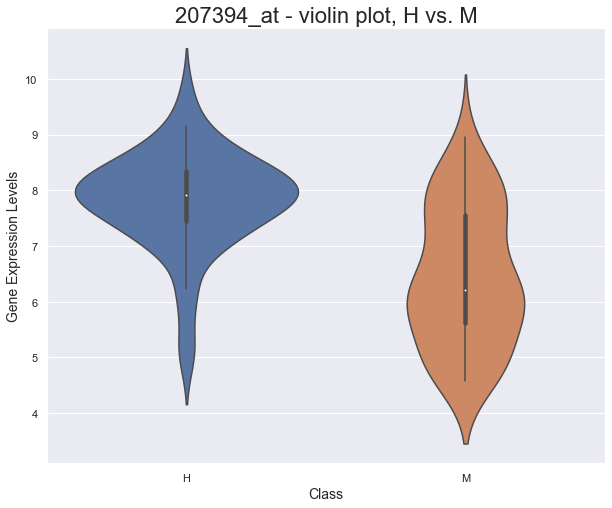

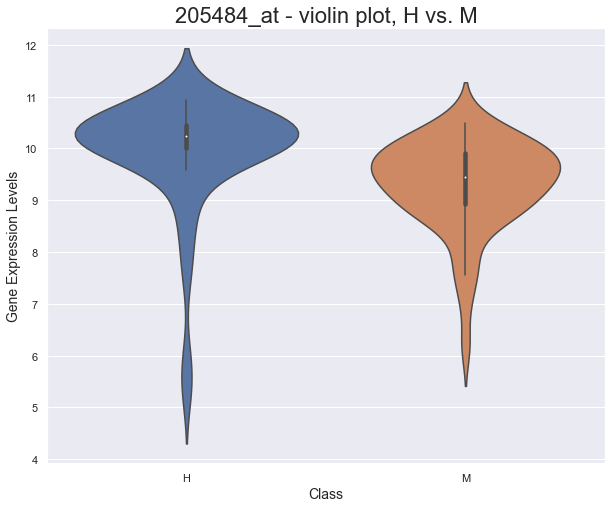

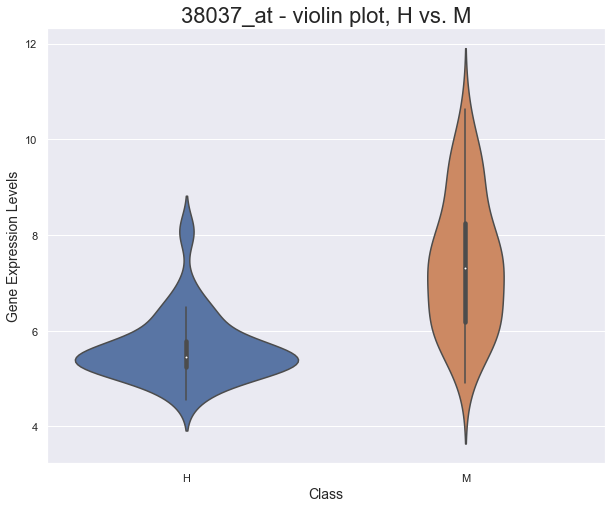

In [123]:
for gene in sampled_genes:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.violinplot(x="class",
                    y=gene,
                    data=D1)

    plt.ylabel("gene expression levels".title(), fontsize=14)
    plt.xlabel("Class", fontsize=14)
    plt.title(f"{gene} - violin plot, H vs. M", fontsize=22)

    plt.show()

it seems clearly via the violin plots, that this genes expression levels behave differently for classes H and M.
We can also look at kde plots:

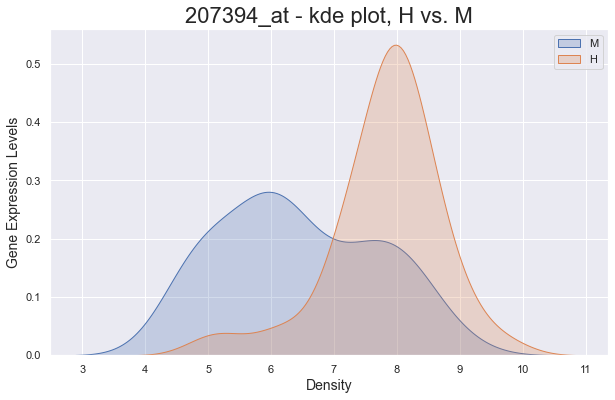

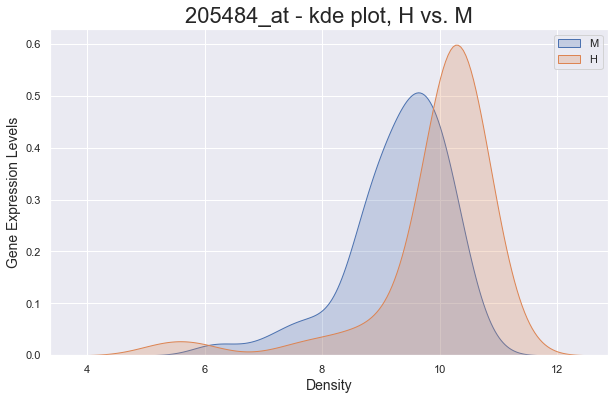

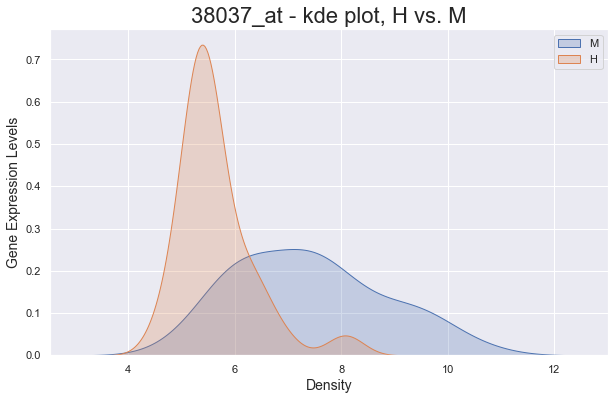

In [128]:
for gene in sampled_genes:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(D1[D1["class"] == "M"][gene], shade=True, label='M')
    sns.kdeplot(D1[D1["class"] == "H"][gene], shade=True, label='H')

    plt.ylabel("gene expression levels".title(), fontsize=14)
    plt.xlabel("Density", fontsize=14)
    plt.title(f"{gene} - kde plot, H vs. M", fontsize=22)
    plt.legend()

    plt.show()

3) Heatmap
Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.

In [165]:
D_gene_matrix = df[["class"] + list(D.gene)].sort_values(by="class")
D_gene_matrix.drop("class", axis=1, inplace=True)
D_gene_matrix

Class,208869_s_at,216248_s_at,204622_x_at,244054_at,203888_at,203887_s_at,217202_s_at,203574_at,241279_at,240103_at,...,223588_at,221081_s_at,222108_at,235310_at,230428_at,235779_at,242874_at,1565882_at,227626_at,224879_at
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,8.070220,5.802974,6.896882,6.711893,5.780497,6.038182,6.781219,9.023625,6.667995,7.770745,...,6.203788,10.616645,8.120315,6.590359,8.718653,7.822442,9.455573,6.969992,8.858780,9.591532
GSM1620871,8.335727,3.532942,5.955067,7.781316,7.033810,6.862840,6.303537,6.563106,4.804661,5.781806,...,4.489424,10.848825,8.624589,7.855175,8.670997,8.297886,9.979932,8.009184,9.568832,9.511296
GSM1620870,8.047862,4.017986,6.229837,6.949568,3.740844,4.407656,6.492431,5.508488,6.328510,3.603050,...,4.689093,10.944627,7.774755,6.579395,8.045056,8.249378,9.859474,6.629139,10.106283,9.717050
GSM1620869,7.877989,5.887662,6.293560,6.665847,5.344064,5.167137,6.408443,6.727558,5.919667,7.036228,...,6.263008,10.205588,7.469209,7.186269,8.263635,7.729706,9.546533,8.323380,9.441652,9.772214
GSM1620867,7.783243,5.500468,6.707403,6.817896,4.590734,4.973400,6.577934,7.274726,3.663484,5.634189,...,5.879191,10.943544,7.965401,8.357936,7.236458,7.663694,8.342528,4.993061,8.993523,10.229350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620881,10.669638,11.385330,12.106938,10.626864,10.483667,10.668353,10.632809,11.444107,9.100989,10.477857,...,3.510720,7.194711,6.829832,5.687830,6.656632,5.584247,7.476776,5.155193,3.620010,9.145754
GSM1620882,9.470576,9.176896,10.085351,9.792534,10.150043,10.000131,8.057794,10.169691,6.685792,10.359783,...,3.047912,8.454015,4.185539,5.546301,6.355525,5.917357,7.221268,4.916064,7.360581,9.352292
GSM1620883,9.302340,9.711687,10.086363,10.023325,9.163310,8.803001,7.844635,11.741422,7.457922,11.463712,...,4.238610,6.019033,5.992220,5.133751,6.432877,5.759961,9.992973,7.510214,6.141448,7.051753


Text(111.5, 0.5, 'Genes')

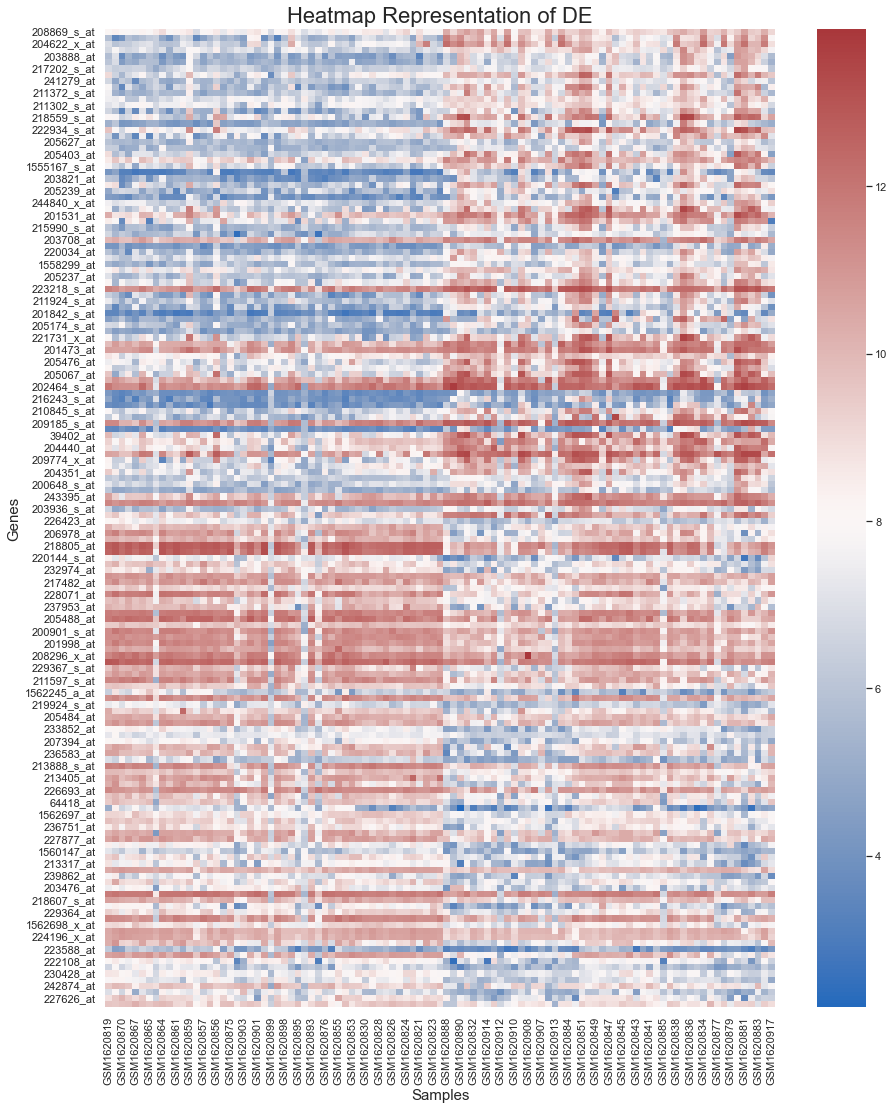

In [167]:
# TODO: maybe a better way to organize? don't invest too much time I think it's ok
plt.figure(figsize = (15, 18))

sns.heatmap(D_gene_matrix.T, cmap="vlag")

plt.title('Heatmap Representation of DE', fontsize=22)
plt.xlabel('Samples', fontsize=15)
plt.ylabel('Genes', fontsize=15)